# 认识数据

赛题背景

In [ ]:
数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。预测未来房屋租金，属于分类问题

评分函数

**R2（R-Square）的公式为**：

得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$ 表示预测值与真实值越接近，损失函数越小，模型评分结果越高
$  详细数据信息 请看链接 赛题官方https://2019ai.futurelab.tv/contest_detail/3#contest_des

# 对比赛做EDA分析

In [140]:
# coding:utf-8
# 导入warning 包 忽略警告语句
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# 导入数据
data_train = pd.read_csv('./数据集/train_data.csv')
data_test = pd.read_csv('./数据集/test_a.csv')

# 数据预览

In [142]:
data_train.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


# **针对 75%**

**住房特征**  
  房屋面积90；  
  总楼层数 16；  
**周围基础设施**  
        该板块当月二手房挂牌房源数　1；  
        该板块地铁站数量 7；  
        公交站数量25.8；  
        国际学校的数量 8；  
        公立学校的数量 61 ；  
        私立学校 9；  
        医院 6；  
        药房 83；  
        健身中心41 ；  
        银行 62；   
        商店：34；  
        公园 1；  
        购物中心 7；  
        超市11.9；  
**地区内成交情况**  
        板块当月二手房成交总金额：8.781700e+08  
        该板块二手房成交总面积：24988  
        该板块二手房成交均价：49738  
        该板块当月二手房成交套数：301  
        该板块当月新房成交总金额：　4.029358e+08  
        该板块当月新房成交的总面积 899.5  
        该板块当月新房成交均价：68808  
        该板块当月新房成交套数 64  
        该板块当月新房未成交套数 524.5  
        该板块当月新房供应套数 0  
        该板块当月土地供应幅数 0  
        该板块当月土地供应面积 0  
        该板块当月土地成交幅数 0  
        该板块当月土地成交面积 0  
        该板块当月土地成交总价 0  
        该板块当月楼板价(元/m^{2}) 0  
**市场需求情况**  
        当前板块现有的办公人数 76668  
        该板块当月流入人口数 0  
        该板块常住人口 330610  
**用户行为信息**  
        该板块当月租客浏览网页次数 3.448500e+04  
        该板块当月租客浏览网页总人数 4.233000e+03  
        线下看房次数 0  
**成交租金 5500**  
**尝试性猜测 **住房特征；周围基础设施；用户行为信息** 属于强相关特征，后期应该多对这些特征进行特征提取，**地区内成交情况** 部分维度数据在属于弱相关数据，侧重可以少一点分析

In [143]:
# 查看空值情况
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [144]:
#后面 分析 PV;UV;renType;buildYear; 存在空值/异常值情况  但是用 info 显示 non-null
# print('PV 异常值情况')
# print(data_train[data_train['pv'].isnull() == True]['pv'])
# print('UV 异常值情况')
# print(data_train[data_train['uv'].isnull() == True]['uv'])
# print('rentType 异常值情况')
print(data_train[data_train['rentType']== '--'].head())
print(data_train[data_train['rentType']== '未知方式'].head())

              ID    area rentType houseType houseFloor  totalFloor  \
4370   100312249   63.26       --    1室2厅1卫          低          30   
4396   100312169   49.00       --    2室1厅1卫          低           7   
4428   100312036   37.80       --    1室1厅1卫          高           7   
38859  100312203  136.00       --    3室2厅2卫          中          37   
39407  100312240   30.00       --    1室1厅1卫          中           6   

      houseToward houseDecoration communityName city  ... landTotalPrice  \
4370            南              其他       XQ03008   SH  ...              0   
4396            南              其他       XQ03002   SH  ...              0   
4428            南              其他       XQ03002   SH  ...              0   
38859           东              其他       XQ02968   SH  ...              0   
39407           北              其他       XQ02980   SH  ...              0   

      landMeanPrice totalWorkers  newWorkers  residentPopulation  pv  uv  \
4370            0.0       102958         492  

In [145]:
data_train.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


# 分类特征与连续特征

In [146]:
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']
numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']

# 缺失值填充

统计缺失值情况

In [147]:
# 针对rentType buildYear
def missing_values(df):
    # 针对 pv uv 统计
    alldata_na = pd.DataFrame(df.isnull().sum(),columns = {'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    # asceding: 默认为Tue升序排序，False 降序排列
    
    alldata_na = alldata_na[alldata_na['missingNum'] > 0].reset_index().sort_values(by = ['missingNum','index'],ascending = [False,True])
#     alldata_na.set_index('index',inplace = True)
    return alldata_na
missing_values(data_train)

,index,missingNum,existNum,sum,missingRatio,dtype
0,pv,18,41422,41440,0.043436,float64
1,uv,18,41422,41440,0.043436,float64


In [148]:
# 针对 rentype
missingNum = len(data_train[data_train['rentType'] == '--']['rentType']) + len(data_train[data_train['rentType'] == '未知方式']['rentType'])
missingRatio =  missingNum/len(data_train) 
print('rentype的missingNum是{},rentype的missingRatio是{}'.format(missingNum,missingRatio))

# 针对 buildYear
missingNum = len(data_train[data_train['buildYear'] == '暂无信息']['buildYear']) 
missingRatio =  missingNum/len(data_train)  
print('buildYear的missingNum是{},buildYear的missingRatio是{}'.format(missingNum,missingRatio))

# 针对 houseToward
missingNum = len(data_train[data_train['houseToward'] == '暂无信息']['houseToward']) 
missingRatio =  missingNum/len(data_train)  
print('houseToward的missingNum是{},houseToward的missingRatio是{}'.format(missingNum,missingRatio))

rentype的missingNum是30764,rentype的missingRatio是0.7423745173745174
buildYear的missingNum是2808,buildYear的missingRatio是0.06776061776061776
houseToward的missingNum是0,houseToward的missingRatio是0.0


In [149]:
# 本想写个表拼接上面那个表 结果发现能力有限

# 单调特征列分析

In [168]:
# 对原始数据 按tradetime 重新排序 在查看是否有单调特征值
data_train = data_train.sort_values(by = 'tradeTime',ascending=True)

In [169]:
# 查看是否有单调特征序列 
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt =  incresing(data_train[col].values)
    if cnt/data_train.shape[0] >= 0.49:
        print('单调增特征：',col)
        print('单调增特征值个数',cnt)
        print('单调增特征值比例',cnt/data_train.shape[0])

单调增特征： ID
单调增特征值个数 20627
单调增特征值比例 0.4977557915057915
单调增特征： area
单调增特征值个数 20653
单调增特征值比例 0.4983832046332046
单调增特征： communityName
单调增特征值个数 20650
单调增特征值比例 0.4983108108108108
单调增特征： tradeMoney
单调增特征值个数 20432
单调增特征值比例 0.49305019305019304


In [167]:
# 查看是否有单调特征序列  
def decresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] < vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt =  decresing(data_train[col].values)
    if cnt/data_train.shape[0] >= 0.49:
        print('单调减特征：',col)
        print('单调减特征值个数',cnt)
        print('单调减特征值比例',cnt/data_train.shape[0])

单调减特征： ID
单调减特征值个数 20673
单调减特征值比例 0.49886583011583013
单调减特征： area
单调减特征值个数 20749
单调减特征值比例 0.500699806949807
单调减特征： communityName
单调减特征值个数 20798
单调减特征值比例 0.5018822393822394
单调减特征： tradeMoney
单调减特征值个数 20373
单调减特征值比例 0.4916264478764479


# 特征nunique分布

rentType的特征分布
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


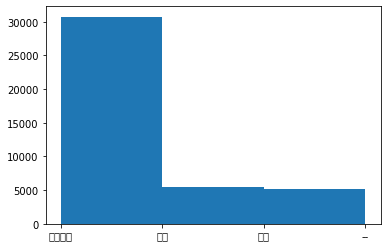

houseType的特征分布
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
4室1厅1卫    1957
3室2厅1卫    1920
1室0厅1卫    1286
1室2厅1卫     933
2室2厅2卫     881
4室2厅2卫     435
2室0厅1卫     419
4室2厅3卫     273
5室1厅1卫     197
2室1厅2卫     155
3室2厅3卫     149
3室1厅2卫     135
1室0厅0卫      86
6室1厅1卫      65
4室2厅4卫      62
5室2厅3卫      54
4室2厅1卫      40
1室1厅2卫      39
4室3厅4卫      34
4室3厅3卫      34
5室2厅2卫      33
5室2厅4卫      30
5室3厅3卫      30
5室3厅4卫      20
4室1厅2卫      20
          ... 
5室5厅4卫       1
3室0厅0卫       1
6室4厅5卫       1
7室3厅4卫       1
6室1厅4卫       1
3室4厅4卫       1
8室2厅3卫       1
0室0厅1卫       1
3室1厅0卫       1
6室4厅4卫       1
4室4厅2卫       1
3室2厅5卫       1
7室1厅7卫       1
6室2厅5卫       1
6室2厅6卫       1
8室2厅4卫       1
4室0厅2卫       1
9室3厅8卫       1
9室2厅5卫       1
7室4厅3卫       1
4室1厅4卫       1
8室4厅4卫       1
8室3厅4卫       1
5室1厅5卫       1
5室1厅3卫       1
6室4厅2卫       1
5室4厅5卫       1
7室1厅3卫       1
5室2厅6卫       1
2室1厅3卫       1
Name: houseType, Length: 104, dtype: int64


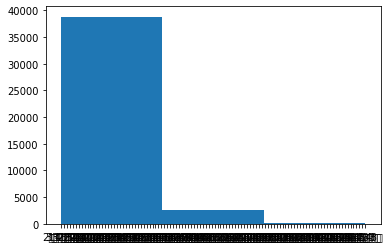

houseFloor的特征分布
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


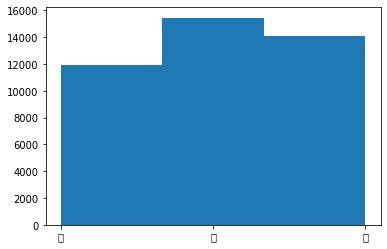

region的特征分布
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


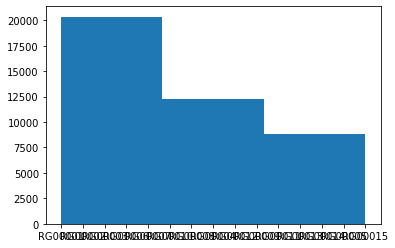

plate的特征分布
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
BK00052    1375
BK00017    1305
BK00041    1266
BK00054    1256
BK00051    1253
BK00046    1227
BK00035    1156
BK00042    1137
BK00009    1016
BK00050     979
BK00043     930
BK00026     906
BK00047     880
BK00034     849
BK00013     834
BK00053     819
BK00028     745
BK00040     679
BK00060     671
BK00010     651
BK00029     646
BK00062     618
BK00022     614
BK00018     613
BK00064     590
           ... 
BK00037     444
BK00012     412
BK00038     398
BK00024     397
BK00020     384
BK00002     357
BK00065     348
BK00027     344
BK00039     343
BK00063     281
BK00057     278
BK00015     253
BK00006     231
BK00021     226
BK00007     225
BK00066     219
BK00030     219
BK00049     211
BK00008     210
BK00004     189
BK00048     165
BK00025     157
BK00023     127
BK00059     122
BK00044      98
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, 

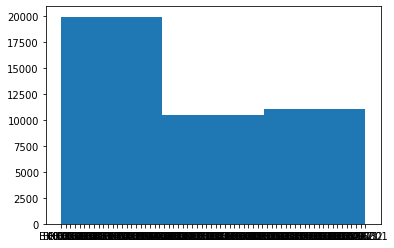

houseToward的特征分布
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


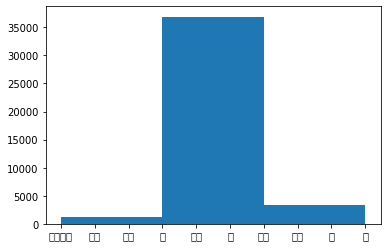

houseDecoration的特征分布
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


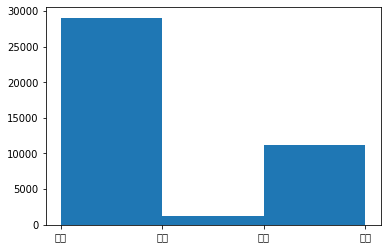

communityName的特征分布
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
XQ01389    166
XQ01658    163
XQ02789    152
XQ00530    151
XQ01561    151
XQ01339    132
XQ01873    122
XQ00826    122
XQ02296    121
XQ01232    119
XQ01401    118
XQ02441    117
XQ00196    115
XQ01207    109
XQ02365    109
XQ01410    108
XQ00852    105
XQ01672    103
XQ02072    103
XQ01642     99
XQ01634     99
XQ01375     99
XQ01970     96
XQ00210     93
XQ00424     92
          ... 
XQ00319      1
XQ01685      1
XQ00944      1
XQ01898      1
XQ03829      1
XQ02082      1
XQ02241      1
XQ00747      1
XQ03564      1
XQ03747      1
XQ01717      1
XQ02642      1
XQ00046      1
XQ03559      1
XQ03756      1
XQ03409      1
XQ02259      1
XQ01845      1
XQ02860      1
XQ01535      1
XQ02670      1
XQ03842      1
XQ03472      1
XQ03604      1
XQ00388      1
XQ01931      1
XQ00991      1
XQ02909      1
XQ00448      1
XQ01195      1
Name: communityName, Length: 4236, dtype: int64


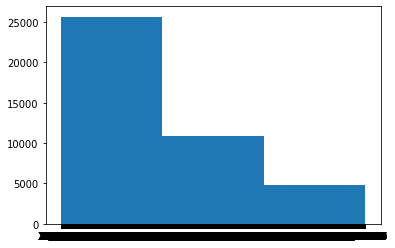

city的特征分布
SH    41440
Name: city, dtype: int64


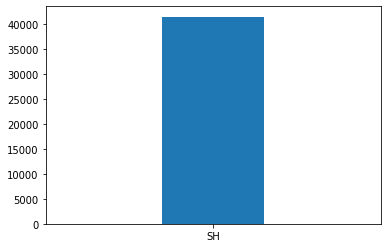

region的特征分布
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


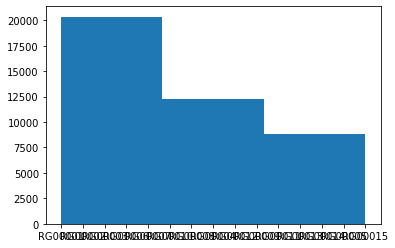

plate的特征分布
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
BK00052    1375
BK00017    1305
BK00041    1266
BK00054    1256
BK00051    1253
BK00046    1227
BK00035    1156
BK00042    1137
BK00009    1016
BK00050     979
BK00043     930
BK00026     906
BK00047     880
BK00034     849
BK00013     834
BK00053     819
BK00028     745
BK00040     679
BK00060     671
BK00010     651
BK00029     646
BK00062     618
BK00022     614
BK00018     613
BK00064     590
           ... 
BK00037     444
BK00012     412
BK00038     398
BK00024     397
BK00020     384
BK00002     357
BK00065     348
BK00027     344
BK00039     343
BK00063     281
BK00057     278
BK00015     253
BK00006     231
BK00021     226
BK00007     225
BK00066     219
BK00030     219
BK00049     211
BK00008     210
BK00004     189
BK00048     165
BK00025     157
BK00023     127
BK00059     122
BK00044      98
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, 

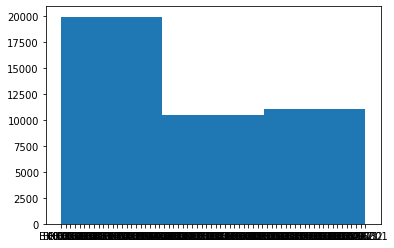

buildYear的特征分布
1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
2005    1814
2010    1774
1995    1685
1993    1543
2011    1498
2004    1431
2009    1271
2014    1238
2003    1156
1997    1125
2002    1120
2012    1049
1996     991
2000     925
2001     898
2015     840
1999     822
1998     733
2013     714
1987     632
1983     612
1991     545
1984     493
1980     452
1990     431
        ... 
1964      39
1960      33
1930      30
1973      23
1955      20
1932      19
2017      14
1952      12
1936      12
1931      11
1968      10
1965       8
1967       7
1937       5
1920       5
1910       5
1949       4
1963       4
1940       4
1912       3
1969       3
1959       3
1970       3
1939       2
1926       2
1972       2
1961       2
1951       1
1950       1
1962       1
Name: buildYear, Length: 80, dtype: int64


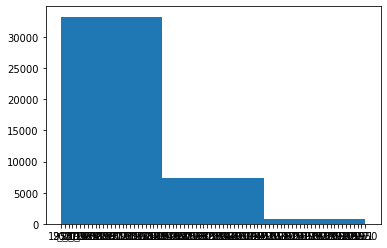

In [59]:
for feature in categorical_feas:
    print(feature + '的特征分布')
    print(data_train[feature].value_counts())
    if feature != 'communiyName':
        plt.hist(data_train[feature],bins = 3)
        plt.show()

In [171]:
# print(data_train['communityName'].value_counts())

# 统计特征值频次大于100的特征

In [173]:
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature,'counts']
    print(df_value_counts[df_value_counts['counts'] >= 1000])

  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
  houseType  counts
0    1室1厅1卫    9805
1    2室1厅1卫    8512
2    2室2厅1卫    6783
3    3室1厅1卫    3992
4    3室2厅2卫    2737
5    4室1厅1卫    1957
6    3室2厅1卫    1920
7    1室0厅1卫    1286
  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916
     region  counts
0   RG00002   11437
1   RG00005    5739
2   RG00003    4186
3   RG00010    3640
4   RG00012    3368
5   RG00004    3333
6   RG00006    1961
7   RG00007    1610
8   RG00008    1250
9   RG00013    1215
10  RG00001    1157
11  RG00014    1069
      plate  counts
0   BK00031    1958
1   BK00033    1837
2   BK00045    1816
3   BK00055    1566
4   BK00056    1516
5   BK00052    1375
6   BK00017    1305
7   BK00041    1266
8   BK00054    1256
9   BK00051    1253
10  BK00046    1227
11  BK00035    1156
12  BK00042    1137
13  BK00009    1016
  houseToward  counts
0           南   34377
1          南北    2254
2           北    2043
  houseDecor

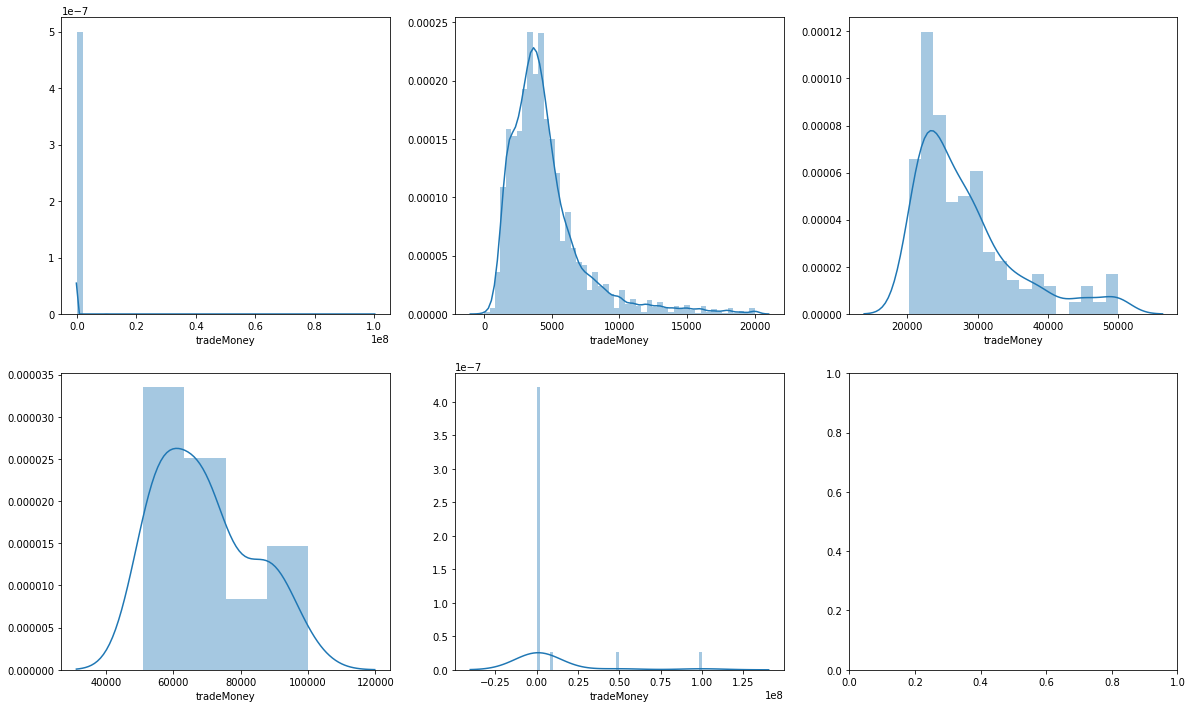

In [176]:
# label 分布
fig,axes = plt.subplots(2,3,figsize = (20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])